# Breast Cancer Recurrence Prediction using Machine Learning

## Dataset

Variables in this dataset are:

***Class***: whether or not there has been a recurrence of cancer<br>
***Age***: patient's age at the time of diagnosis<br>
***Menopause***: menopausal status of the patient at the time of diagnosis, pre-menopausal (*premeno*) or post-menopausal (*ge40*, *lt40*) at the time of diagnosis:<br>
***Tumour Size***: the size of tumour (mm) at the time of diagnosis<br>
***Invasive Nodes***: the total number of lymph nodes confirming Breast Cancer at the time of the histological examination<br>
***Node Caps***: whether the tumour penetrated in the lymph node capsule<br>
***Degree of Malignancy***: divided into 1 -2 or 3, depending on the malignancy of the tumour<br>
***Breast***: the position of the tumour (left or right breast)<br>
***Breast Quadrant***: the quadrant of the breast where the tumour is present<br>
***Irradiation***: whether radiation therapy has been used as a treatment to destroy cancer cells<br>

The data is provided as two separate ```.data``` files<br>
- ```breast-cancer.data```, containing the dataset 
- ```breast-cancer.names```, containing relevant informations about the dataset

In [245]:
# import the files
data = open("./breast-cancer.data")
feat = open("./breast-cancer.names")

data = data.read()
feat = feat.read()

In [246]:
# preview dataset
print(data.split('\n',1)[0])
print(data.split('\n',2)[1])

no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no


In [247]:
# view informations about dataset
print(feat)

Citation Request:
   This breast cancer domain was obtained from the University Medical Centre,
   Institute of Oncology, Ljubljana, Yugoslavia.  Thanks go to M. Zwitter and 
   M. Soklic for providing the data.  Please include this citation if you plan
   to use this database.

1. Title: Breast cancer data (Michalski has used this)

2. Sources: 
   -- Matjaz Zwitter & Milan Soklic (physicians)
      Institute of Oncology 
      University Medical Center
      Ljubljana, Yugoslavia
   -- Donors: Ming Tan and Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
   -- Date: 11 July 1988

3. Past Usage: (Several: here are some)
     -- Michalski,R.S., Mozetic,I., Hong,J., & Lavrac,N. (1986). The 
        Multi-Purpose Incremental Learning System AQ15 and its Testing 
        Application to Three Medical Domains.  In Proceedings of the 
        Fifth National Conference on Artificial Intelligence, 1041-1045,
        Philadelphia, PA: Morgan Kaufmann.
        -- accuracy range: 66%-72%
     -

In the informative file we have important informations about the dataset at *7. Attribute Information* and there is specified that the dataset includes missing values denoted with the attribute '?'

In [248]:
# replace missing dataset attribute to NAN
data = data.replace('?','')

<ins>*for Giovanni Notes*:</ins> I prefered to replace the missing data attribute from ***?*** to ***NAN*** straight away while still as a ***str*** file

## Exploratory Data Analysis

### Transforming to DataFrame

The data is stored as ```str``` it is necessary to convert it to ```DataFrame``` format

In [265]:
# import libraries
import pandas as pd
pd.set_option('display.max_colwidth', None) #setting max colwidth to view the entire dataset when using the print() command
from io import StringIO
import matplotlib.pyplot as plt

In [250]:
# convert data from str to dataframe
data = StringIO(data)
data = pd.read_csv(data, sep=",")
print(type(data))

<class 'pandas.core.frame.DataFrame'>


Now that the data is correctely converted into a DataFrame table, I will rename the columns following the attributes in the ```.names``` file

In [263]:
data.columns = ['class', 'age', 'menopause', 'tumour_size', 'inv_nodes', 'node_caps', 'deg_malig', 'breast', 'breast_quad', 'irrad']
data.columns

Index(['class', 'age', 'menopause', 'tumour_size', 'inv_nodes', 'node_caps',
       'deg_malig', 'breast', 'breast_quad', 'irrad'],
      dtype='object')

In [261]:
# preview the DataFrame table created
data.head()

,class,age,menopause,tumour_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irrad
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


### Explore the Dataset

In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        285 non-null    object
 1   age          285 non-null    object
 2   menopause    285 non-null    object
 3   tumour_size  285 non-null    object
 4   inv_nodes    285 non-null    object
 5   node_caps    277 non-null    object
 6   deg_malig    285 non-null    int64 
 7   breast       285 non-null    object
 8   breast_quad  284 non-null    object
 9   irrad        285 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.4+ KB


All the variables in the dataset are of type ```object```, except for ```'deg_malig'```.

<ins>*for Giovanni Notes*:</ins> the data shows in fact there are missing values *277 of 285* in ```'node_caps'``` attribute and *284 of 285* in ```'breast_quad'```

In [259]:
data.describe()

,deg_malig
count,285.000000
mean,2.045614
std,0.737351
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


<ins>*for Giovanni Notes*:</ins> is it useless to print ```.describe()``` in this case?

### Explore the Attributes

I want to have a more thorough look at the data inside each attribute, starting from ```'class'``` which contains information about recurrence of the Breast Cancer

<AxesSubplot: >

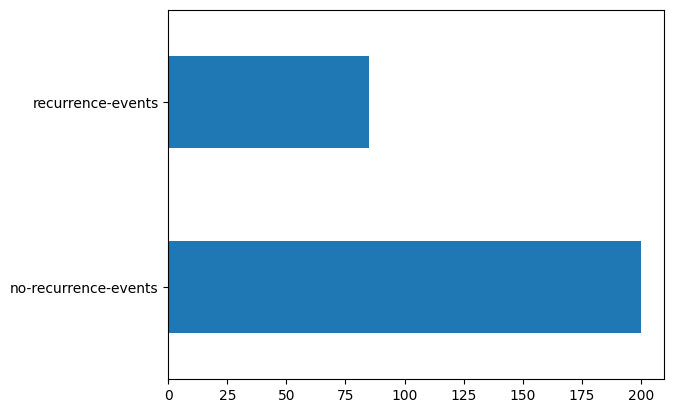

In [282]:
class_ = data['class'].value_counts()
class_.plot.barh()

About 70% of the dataset includes patients that didn't experience a recurrence of the disease.

<AxesSubplot: >

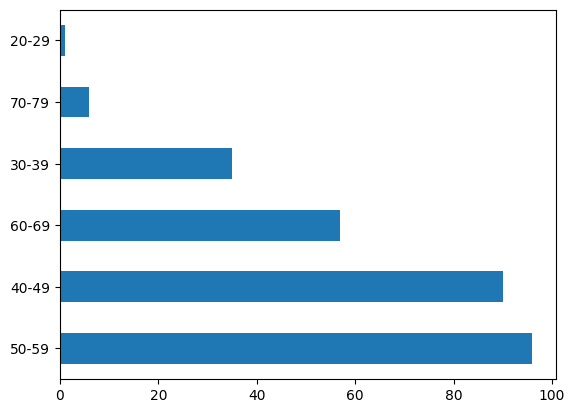

In [281]:
age_ = data['age'].value_counts()
age_.plot.barh()

Most patients in the dataset fall into the age group *40-59* which will probably mean an even value count of *premeno* (Pre-monopause), *lt40* and *ge40* are both values representing Post-menopause.

<AxesSubplot: >

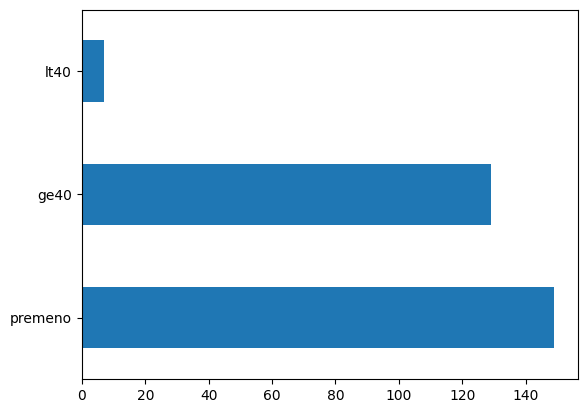

In [283]:
menopause_ = data['menopause'].value_counts()
menopause_.plot.barh()

<AxesSubplot: >

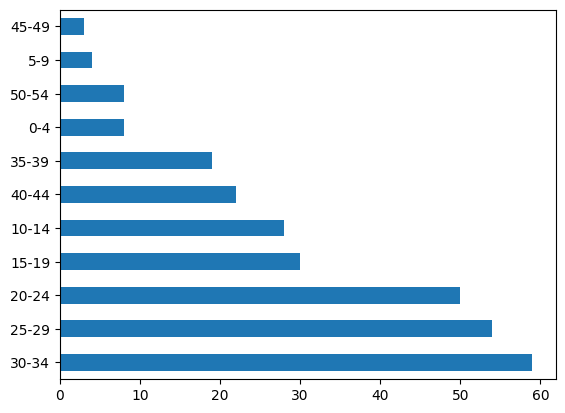

In [284]:
tumour_size_ = data['tumour_size'].value_counts()
tumour_size_.plot.barh()

```'tumour_size'``` is expressed in mm.<br>
In the dataset, most tumor sizes fall into the *20mm-34mm* group.

<AxesSubplot: >

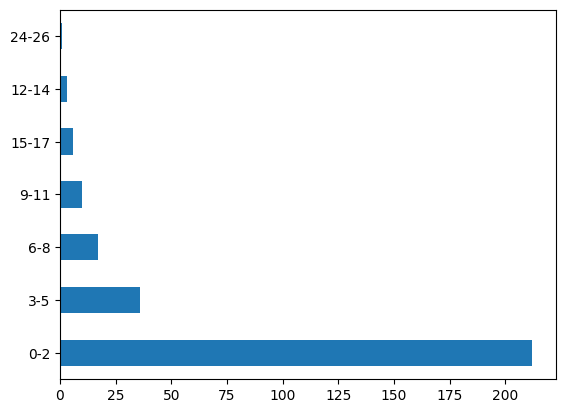

In [285]:
inv_nodes_ = data['inv_nodes'].value_counts()
inv_nodes_.plot.barh()

Most number of lymph nodes that resulted invaded by the tumour fall into the group *0-2*.

<AxesSubplot: >

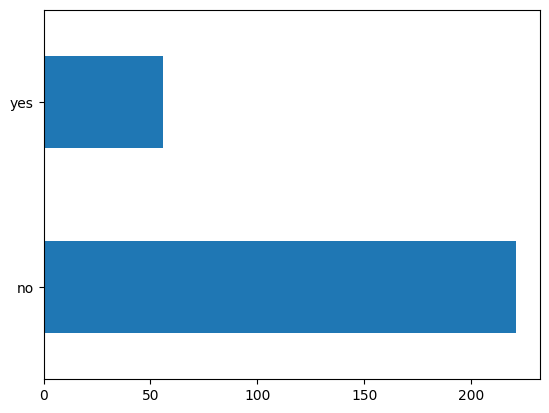

In [286]:
node_caps_ = data['node_caps'].value_counts()
node_caps_.plot.barh()

Most of the lymph nodes that were removed from the patient didn't result with the capsule being perforated.

<AxesSubplot: >

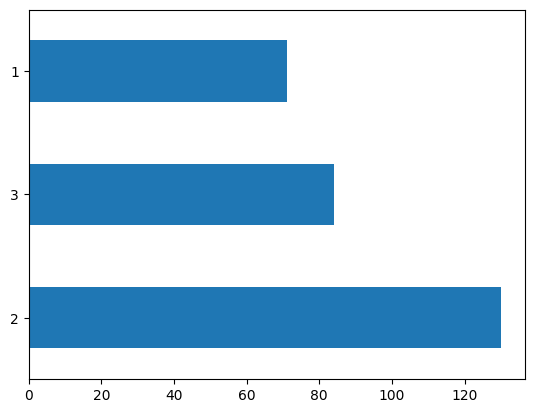

In [287]:
deg_malig_ = data['deg_malig'].value_counts()
deg_malig_.plot.barh()

<AxesSubplot: >

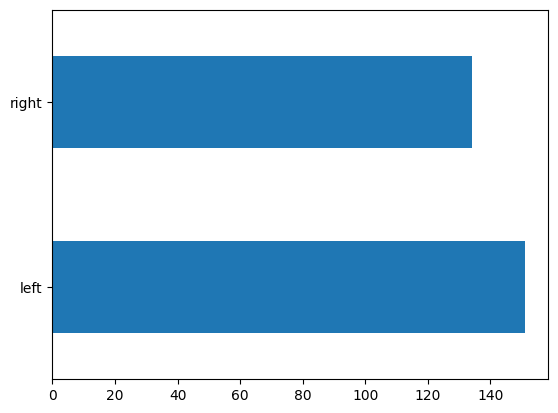

In [288]:
breast_ = data['breast'].value_counts()
breast_.plot.barh()

<AxesSubplot: >

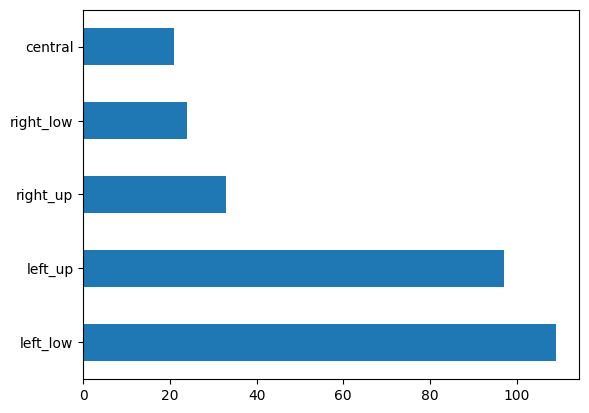

In [289]:
breast_quad_= data['breast_quad'].value_counts()
breast_quad_.plot.barh()

The breast count is even *right* and *left* while the quadrant has a higher value count on the *left_up* and *left_low* group.

<AxesSubplot: >

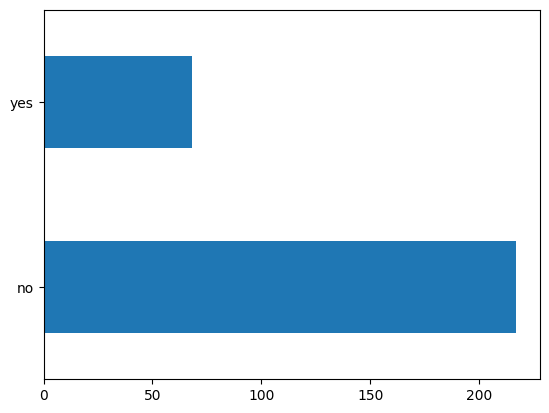

In [290]:
irrad_ = data['irrad'].value_counts()
irrad_.plot.barh()

Most of the patients into this dataset didn't undergo Radiation Therapy. 

**Missing Values**<br>
There were missing values on the dataset.

In [292]:
# identify where the missing values are in the dataset
data.isna().any()

class          False
age            False
menopause      False
tumour_size    False
inv_nodes      False
node_caps       True
deg_malig      False
breast         False
breast_quad     True
irrad          False
dtype: bool

In [293]:
# find % of missing values per single attribute in the dataset
nan = data.isna().sum()
tot = data.count()
perc = (nan*100)/tot

In [294]:
perc

class          0.000000
age            0.000000
menopause      0.000000
tumour_size    0.000000
inv_nodes      0.000000
node_caps      2.888087
deg_malig      0.000000
breast         0.000000
breast_quad    0.352113
irrad          0.000000
dtype: float64

I will replace ```object``` attributes to ```int64``` in order to have valid data to train the machine learning model and to analyse correlation between attributes.<br>
So I will replace missing data with a value that won't be represented in the analysis.

In [295]:
# replace missing data
data['node_caps'] = data['node_caps'].fillna(0)
data['breast_quad'] = data['breast_quad'].fillna(5)

I will check outliers on the only numerical column in the dataset ```'deg_malig'```.

In [305]:
# import the library
import seaborn as sns

<AxesSubplot: xlabel='deg_malig'>

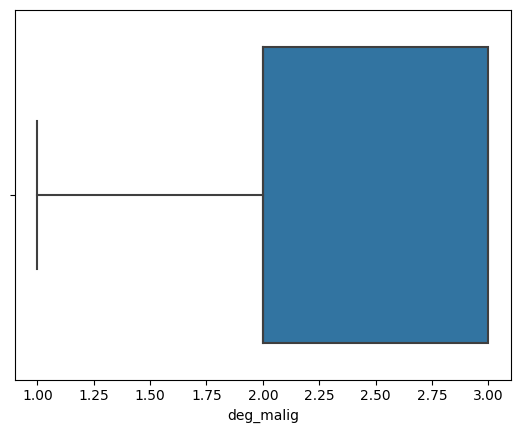

In [306]:
sns.boxplot(x=data['deg_malig'])

Now I replace into numerical values to convert column type from ```'object'``` to ```'int64'```.

In [297]:
data['class'] = data['class'].replace(['no-recurrence-events','recurrence-events'], [0,1])
data['age'] = data['age'].replace(['20-29', '30-39','40-49','50-59','60-69','70-79'],[0,1,2,3,4,5])
data['menopause'] = data['menopause'].replace(['premeno','ge40','lt40'],[0,1,2])
data['tumour_size'] = data['tumour_size'].replace(['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54'],[0,1,2,3,4,5,6,7,8,9,10])
data['inv_nodes'] = data['inv_nodes'].replace(['0-2','3-5','6-8','9-11','12-14','15-17','24-26'],[0,1,2,3,4,5,6])
data['node_caps'] = data['node_caps'].replace(['no','yes'],[0,1])
data['breast'] = data['breast'].replace(['left','right'],[0,1])
data['breast_quad'] = data['breast_quad'].replace(['left_low','left_up','right_up','right_low','central'],[0,1,2,3,4])
data['irrad'] = data['irrad'].replace(['no','yes'],[0,1])

### Correlation Between Attributes and Identification of Target Attributes

The target attribute is ```'class'``` as the ML model should predict if a patient is likely to experience a reccurrence of the Breast Cancer.

In [307]:
# compute the correlation between attributes
data.corr()

,class,age,menopause,tumour_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irrad
class,1.000000,-0.075897,-0.051173,0.176498,0.275416,0.275989,0.303457,-0.060927,-0.034854,0.192887
age,-0.075897,1.000000,0.670007,-0.007522,-0.047671,-0.057262,-0.079114,-0.047497,-0.053809,-0.045551
menopause,-0.051173,0.670007,1.000000,-0.028768,-0.007281,-0.066170,0.012875,-0.080146,-0.023651,-0.077055
tumour_size,0.176498,-0.007522,-0.028768,1.000000,0.169965,0.205053,0.216500,0.051622,-0.136146,0.165634
inv_nodes,0.275416,-0.047671,-0.007281,0.169965,1.000000,0.596021,0.336050,-0.022711,-0.046560,0.324007
node_caps,0.275989,-0.057262,-0.066170,0.205053,0.596021,1.000000,0.329268,-0.005835,-0.004726,0.303283
deg_malig,0.303457,-0.079114,0.012875,0.216500,0.336050,0.329268,1.000000,-0.048827,-0.033771,0.211362
breast,-0.060927,-0.047497,-0.080146,0.051622,-0.022711,-0.005835,-0.048827,1.000000,0.100203,0.016957
breast_quad,-0.034854,-0.053809,-0.023651,-0.136146,-0.046560,-0.004726,-0.033771,0.100203,1.000000,-0.075102
irrad,0.192887,-0.045551,-0.077055,0.165634,0.324007,0.303283,0.211362,0.016957,-0.075102,1.000000


There seems to be a medium/strong correlation between ```'age'``` and ```'menopause'``` for obvious reasons.<br>
Interestingly there is a medium/strong correlation between ```'node_caps'``` and ```'inv_nodes'``` that have both a correlation with ```'deg_malig'``` and ```'irrad'```. But ```'tumour_size'``` has a correlation as well that might be important to dig into.<br>

I want to visualize the correlation data using a Heatmap.

<AxesSubplot: >

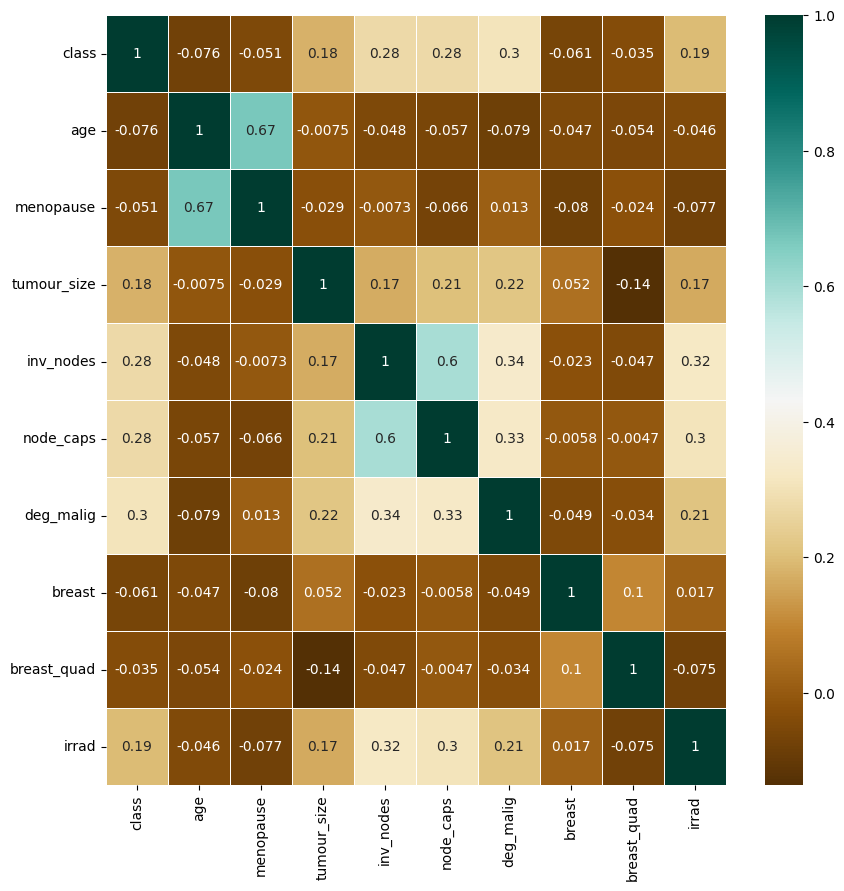

In [308]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data.corr(), cmap='BrBG', annot=True, linewidth=.5)

Before analyzing the correlations, I want to visualize the correlation between the target attribute ```class``` and the other attributes of the dataset.

<AxesSubplot: >

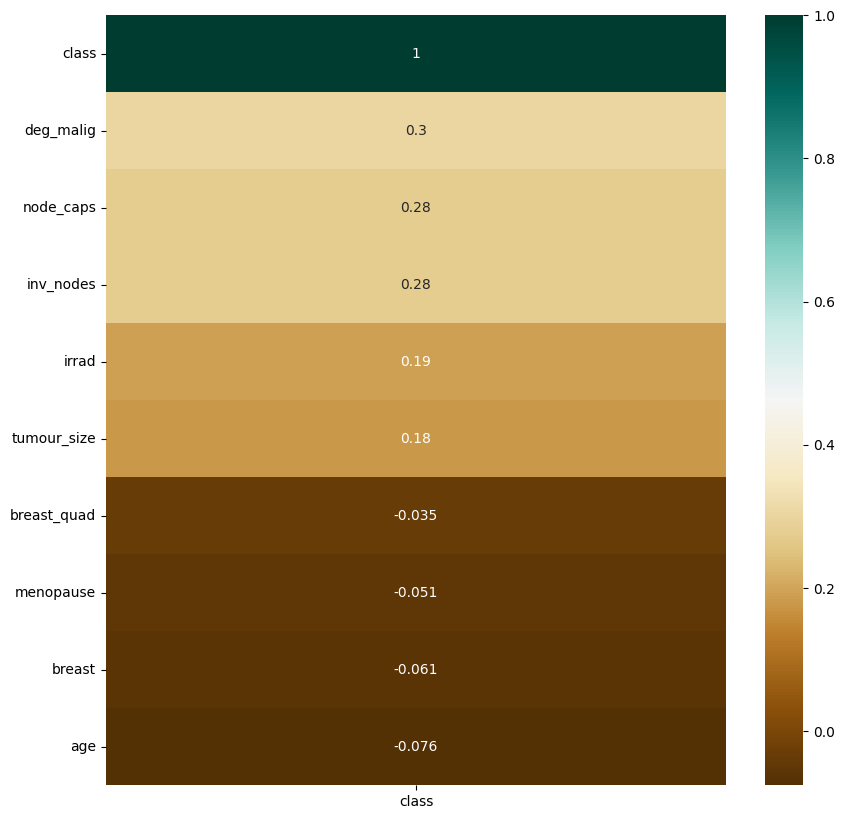

In [309]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr()[['class']].sort_values(
    by='class', ascending=False),annot=True,cmap='BrBG')

There is a correlation between ```'class'``` and ```'deg_malig'``` and interesting to see ```'node_caps'``` and ```'node_caps'``` can be considered as a correlation with the target attribute.

I want to dig deeper into the correlation between the target attribute and the *degree of malignancy* of the tumour.<br>
One hypothesis is that the more the degree of malignancy the more probability that the patient will experience reccurrence of the tumour.

In [310]:
# create a crosstab of 'class' and 'deg_malig'
tab1 = pd.crosstab(
    data['class'],
    data['deg_malig'],
    margins=True,
    normalize=True,
)

In [311]:
tab1

deg_malig,1,2,3,All
class,,,,
0,0.207018,0.357895,0.136842,0.701754
1,0.042105,0.098246,0.157895,0.298246
All,0.249123,0.456140,0.294737,1.000000


<AxesSubplot: xlabel='deg_malig', ylabel='class'>

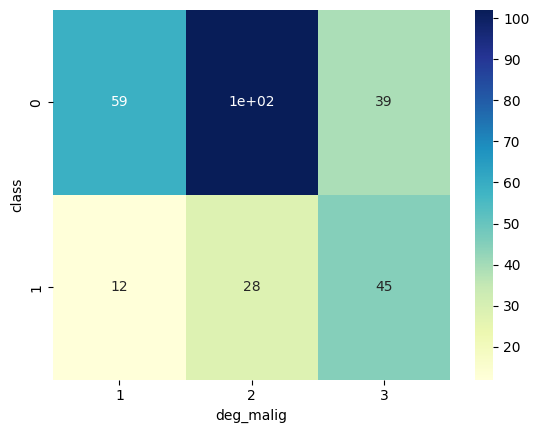

In [312]:
# visualize the correlation in the crosstab using a heatmap
sns.heatmap(pd.crosstab(data['class'], data['deg_malig']), cmap="YlGnBu", annot=True)

Text(0.5, 1.0, 'Correlation of Recurrence Class and Degree of Malignancy of the Disease')

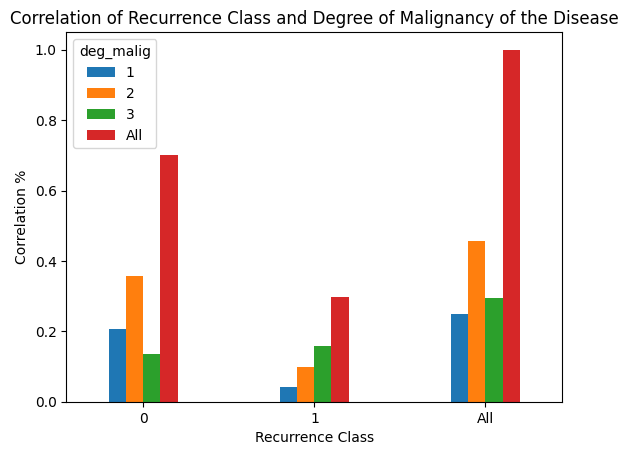

In [349]:
# plot the crosstab
barplot = tab1.plot.bar(rot=0, width=0.4)
plt.xlabel("Recurrence Class")
plt.ylabel("Correlation %")
plt.title("Correlation of Recurrence Class and Degree of Malignancy of the Disease")

Considering that in this dataset *In this dataset here are more patients that didn't experience a recurrence of the disease*
The crosstab shows that there is a correlation link between recurrence of the tumour and its degree of malignancy.<br>

For patients that experienced a recurrence of the tumour ```1``` there were a higher percentage that had a tumour classified as *3* as Degree of Malignancy.<br>
For patients that didn't experience a recurrence of the tumour ```0``` there a higher percentage of *2* as degree of malignancy.<br>

**This analysis shows that for higher degree of malignancy of tumour the patient is more subject to experience a reccurrence of the cancer.<br>However degree of malignancy isn't enough to proove a sure recurrence,** as some patients had *2* as degree of malignancy but didn't experience a reccurrence.

Generally, the more aggressive (*malignant*) is the tumour the more it will spread and attack lymph nodes. For the same reason, there will be a higher percentage of patients with tumour that penetrated the lymph nodes capsule. <br>

Usually for biopsy, about 10 to 40 nodes are removed that contain cancer cells. If the lymph node has a very low to no cancer cells count it is usally not removed and the patient has to undergo further therapies, such as Radiation Therapy.

<font size="3">_*biopsy: an examination of tissue removed from a living body to discover the presence, cause, or extent of a disease.*_</font>

I want to dig deeper into the correlation between ```'class'``` with ```'inv_nodes'``` and ```'node_caps'``` 

In [315]:
# create a crosstab of 'class' and 'inv_nodes'
tab2 = pd.crosstab(
    data['class'],
    data['inv_nodes'],
    margins=True,
    normalize=True,
)

In [316]:
tab2

inv_nodes,0,1,2,3,4,5,6,All
class,,,,,,,,
0,0.582456,0.066667,0.024561,0.014035,0.003509,0.010526,0.000000,0.701754
1,0.161404,0.059649,0.035088,0.021053,0.007018,0.010526,0.003509,0.298246
All,0.743860,0.126316,0.059649,0.035088,0.010526,0.021053,0.003509,1.000000


<AxesSubplot: xlabel='inv_nodes', ylabel='class'>

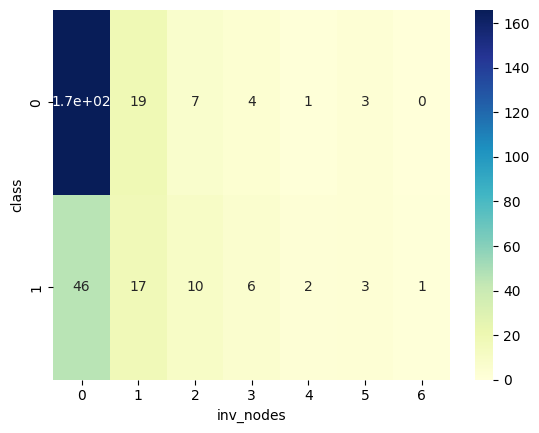

In [317]:
# visualize the correlation in the crosstab using a heatmap
sns.heatmap(pd.crosstab(data['class'], data['inv_nodes']), cmap="YlGnBu", annot=True)

Text(0.5, 1.0, 'Correlation of Total number of lymph nodes confirming Breast Cancer and Recurrence Class')

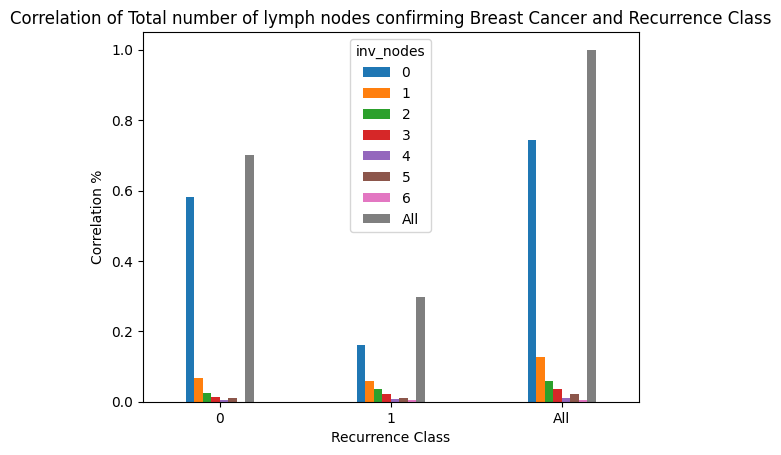

In [350]:
# plot the crosstab
barplot = tab2.plot.bar(rot=0, width=0.4)
plt.xlabel("Recurrence Class")
plt.ylabel("Correlation %")
plt.title("Correlation of Total number of lymph nodes confirming Breast Cancer and Recurrence Class")

In [319]:
# create a crosstab of 'class' and 'node_caps'
tab3 = pd.crosstab(
    data['class'],
    data['node_caps'],
    margins=True,
    normalize=True,
)

In [321]:
tab3

node_caps,0,1,All
class,,,
0,0.614035,0.087719,0.701754
1,0.189474,0.108772,0.298246
All,0.803509,0.196491,1.000000


<AxesSubplot: xlabel='node_caps', ylabel='class'>

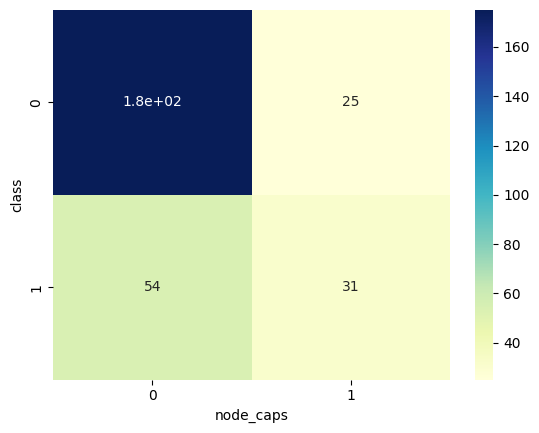

In [320]:
# visualize the correlation in the crosstab using a heatmap
sns.heatmap(pd.crosstab(data['class'], data['node_caps']), cmap="YlGnBu", annot=True)

Text(0.5, 1.0, 'Correlation of Capsule of the lymphnode penetrated by the tumor and Recurrence Class')

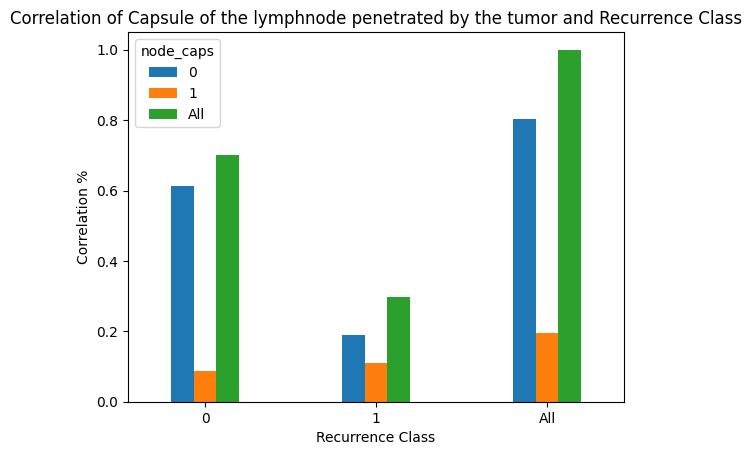

In [351]:
# plot the crosstab
barplot = tab3.plot.bar(rot=0, width=0.4)
plt.xlabel("Recurrence Class")
plt.ylabel("Correlation %")
plt.title("Correlation of Capsule of the lymphnode penetrated by the tumor and Recurrence Class")

The plot analysis shows that, for patients that experienced a recurrence of the disease, there were a higher proportion of lymph nodes with perforated capsules. The number of lymph nodes containing cancer cells is higher in proportion for patients that experienced a recurrence.<br>

I want to understand better the correlation between invaded number of lymph nodes and nodes that had the capsule perforated by the tumour.

In [331]:
# create a crosstab of 'inv_nodes' and 'node_caps'
tab4 = pd.crosstab(
    data['inv_nodes'],
    data['node_caps'],
    margins=True,
    normalize=True,
)

In [332]:
tab4

node_caps,0,1,All
inv_nodes,,,
0,0.712281,0.031579,0.743860
1,0.059649,0.066667,0.126316
2,0.010526,0.049123,0.059649
3,0.014035,0.021053,0.035088
4,0.003509,0.007018,0.010526
5,0.003509,0.017544,0.021053
6,0.000000,0.003509,0.003509
All,0.803509,0.196491,1.000000


<AxesSubplot: xlabel='node_caps', ylabel='inv_nodes'>

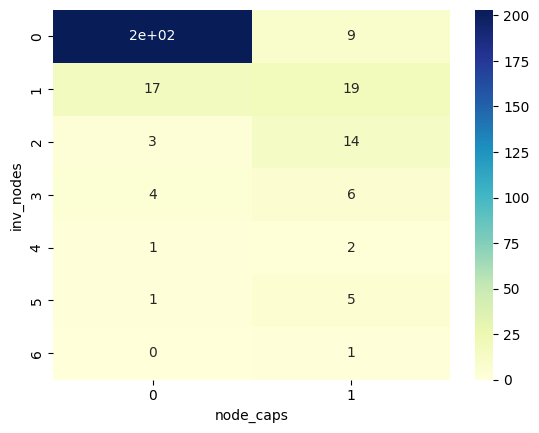

In [333]:
# visualize the correlation in the crosstab using a heatmap
sns.heatmap(pd.crosstab(data['inv_nodes'], data['node_caps']), cmap="YlGnBu", annot=True)

Text(0.5, 1.0, 'Correlation of Capsule of the lymphnode penetrated by the tumor and the Number of Invaded Nodes')

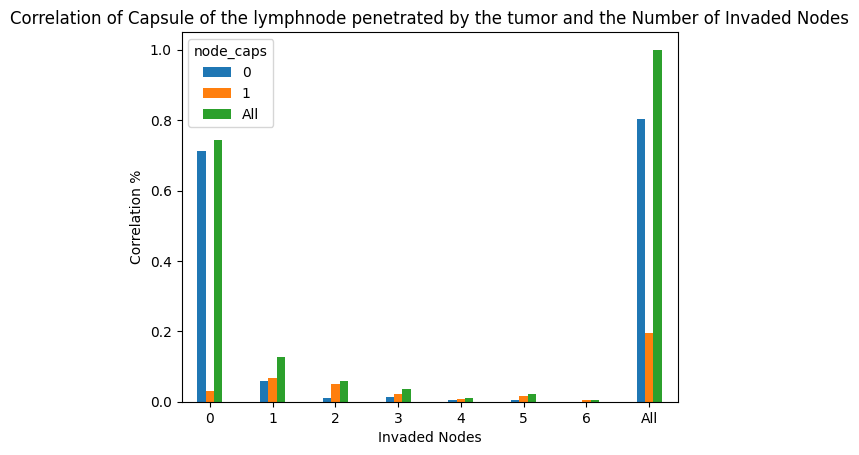

In [352]:
# plot the crosstab
barplot = tab4.plot.bar(rot=0, width=0.4)
plt.xlabel("Invaded Nodes")
plt.ylabel("Correlation %")
plt.title("Correlation of Capsule of the lymphnode penetrated by the tumor and the Number of Invaded Nodes")

The more the number of invaded lymph nodes the more likely their capsule will be perforated.

Radiation as a therapy is not mandatory for every patient. It is used to reduce the patient's risk of breast cancer recurring after surgery. It is also commonly used to ease tyhe symptoms caused by cancer that has spread to other parts of the body (metastatic breast cancer).<br>

I want to see the correlation between ```'class'``` and ```'irrad'```.

In [335]:
tab5 = pd.crosstab(
    data['class'],
    data['irrad'],
    margins=True,
    normalize=True,
)

In [336]:
tab5

irrad,0,1,All
class,,,
0,0.571930,0.129825,0.701754
1,0.189474,0.108772,0.298246
All,0.761404,0.238596,1.000000


<AxesSubplot: xlabel='irrad', ylabel='class'>

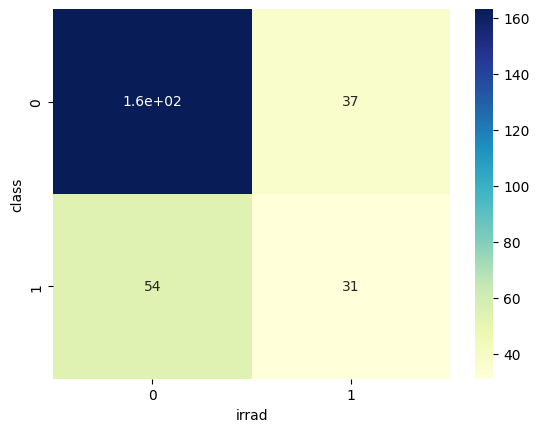

In [337]:
sns.heatmap(pd.crosstab(data['class'], data['irrad']), cmap="YlGnBu", annot=True)

Text(0.5, 1.0, 'Correlation of Patient that had Radiation Therapy and Recurrence Class')

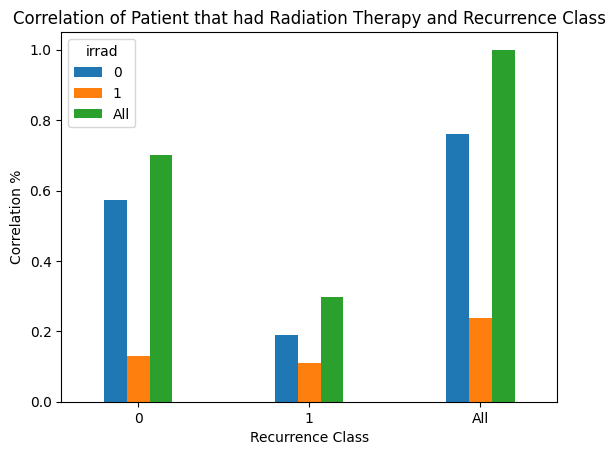

In [353]:
barplot = tab5.plot.bar(rot=0, width=0.4)
plt.xlabel("Recurrence Class")
plt.ylabel("Correlation %")
plt.title("Correlation of Patient that had Radiation Therapy and Recurrence Class")

There is clearly a higher proportion of patient that got radiation therapy and still experienced a recurrence of the disease.<br>
**According to this dataset, having radiation isn't enough to prevent reccurrence.**

I want to visualize the correlation between ```'class'``` and ```'tumour_size'```.

In [343]:
tab6 = pd.crosstab(
    data['tumour_size'],
    data['class'],
    margins=True,
    normalize=True,
)

In [344]:
tab6

class,0,1,All
tumour_size,,,
0,0.024561,0.003509,0.028070
1,0.014035,0.000000,0.014035
2,0.094737,0.003509,0.098246
3,0.080702,0.024561,0.105263
4,0.119298,0.056140,0.175439
5,0.126316,0.063158,0.189474
6,0.119298,0.087719,0.207018
7,0.042105,0.024561,0.066667
8,0.056140,0.021053,0.077193


<AxesSubplot: xlabel='tumour_size', ylabel='class'>

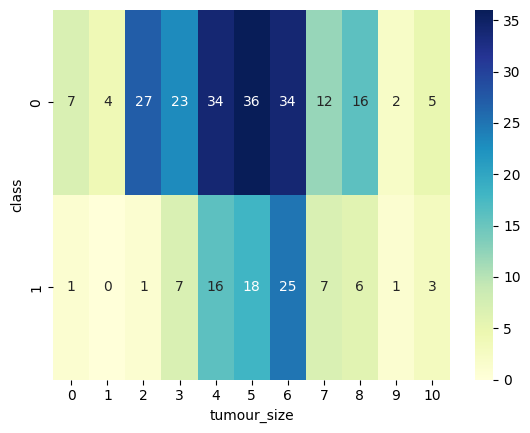

In [345]:
sns.heatmap(pd.crosstab(data['class'], data['tumour_size']), cmap="YlGnBu", annot=True)

Text(0.5, 1.0, 'Correlation of Tumour Size (in mm) and Recurrence Class')

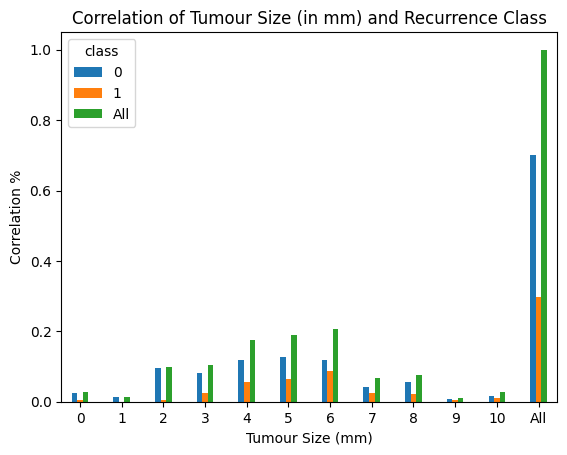

In [355]:
barplot = tab6.plot.bar(rot=0, width=0.4)
plt.xlabel("Tumour Size (mm)")
plt.ylabel("Correlation %")
plt.title("Correlation of Tumour Size (in mm) and Recurrence Class")

There is a correlation [...] but [...]

## Feature Selection

The target variable is ```'class'``` as the output of the model should be wether or note the patient is subject to recurrence of the disease.<br>

I want to proceed with feature selection to understand the most important features for the model. 

In [357]:
# Independent and dependent variables
y = data['class']
X = data.drop(['class'], axis = 1)

In [358]:
from sklearn.model_selection import train_test_split
# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=100, test_size=0.42)    

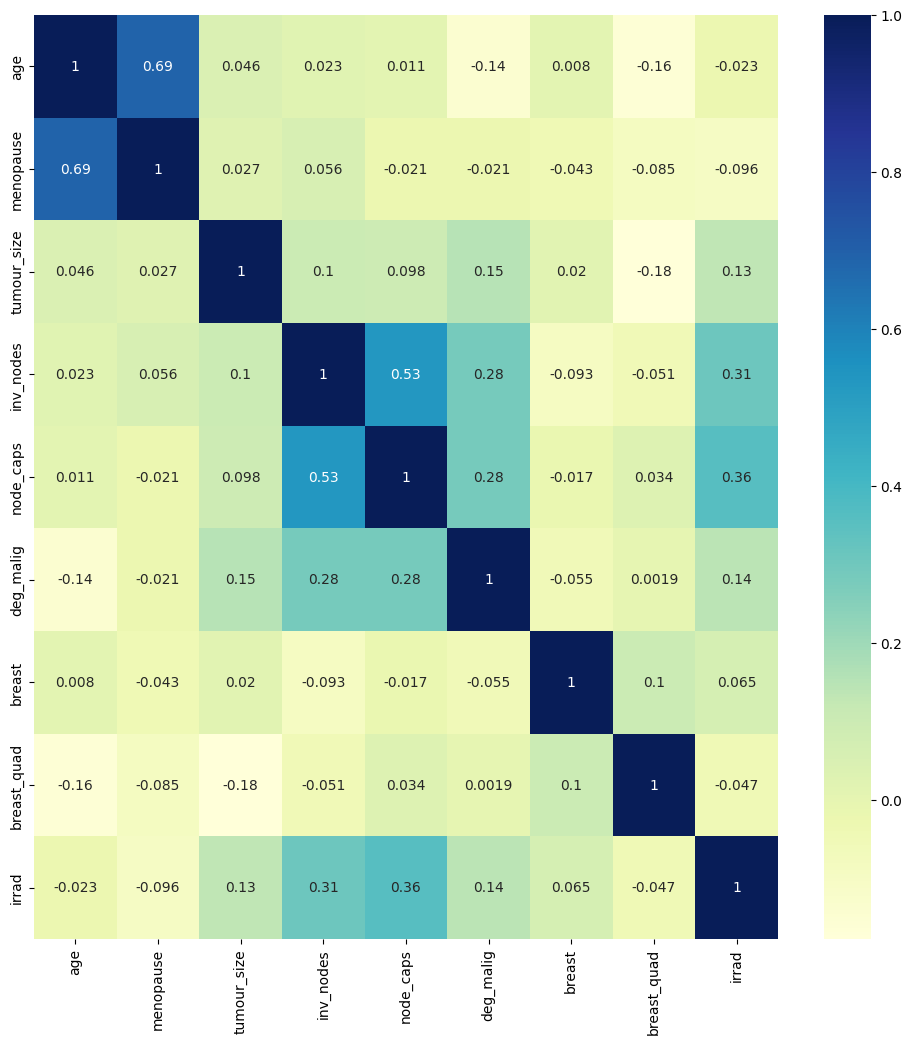

In [359]:
# vsualize the correlation between train features with a heatmap
cor = X_train.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()  

#### Feature Selection Using Random Forest Classifier

*Tree-based machine learning algorithms like DecisionTreeClassifier or their ensemble learning equivalent RandomForestClassifier uses a set of trees which contains nodes resulting from splitting. The main aim of those splits is to decrease impurity as much as possible by using impurity measures like entropy and gini index. Those tree-based models can calculate how much important a feature is by calculating the amount of impurity decrease this feature will lead to.*

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'age'),
  Text(1, 0, 'menopause'),
  Text(2, 0, 'tumour_size'),
  Text(3, 0, 'inv_nodes'),
  Text(4, 0, 'node_caps'),
  Text(5, 0, 'deg_malig'),
  Text(6, 0, 'breast'),
  Text(7, 0, 'breast_quad'),
  Text(8, 0, 'irrad')])

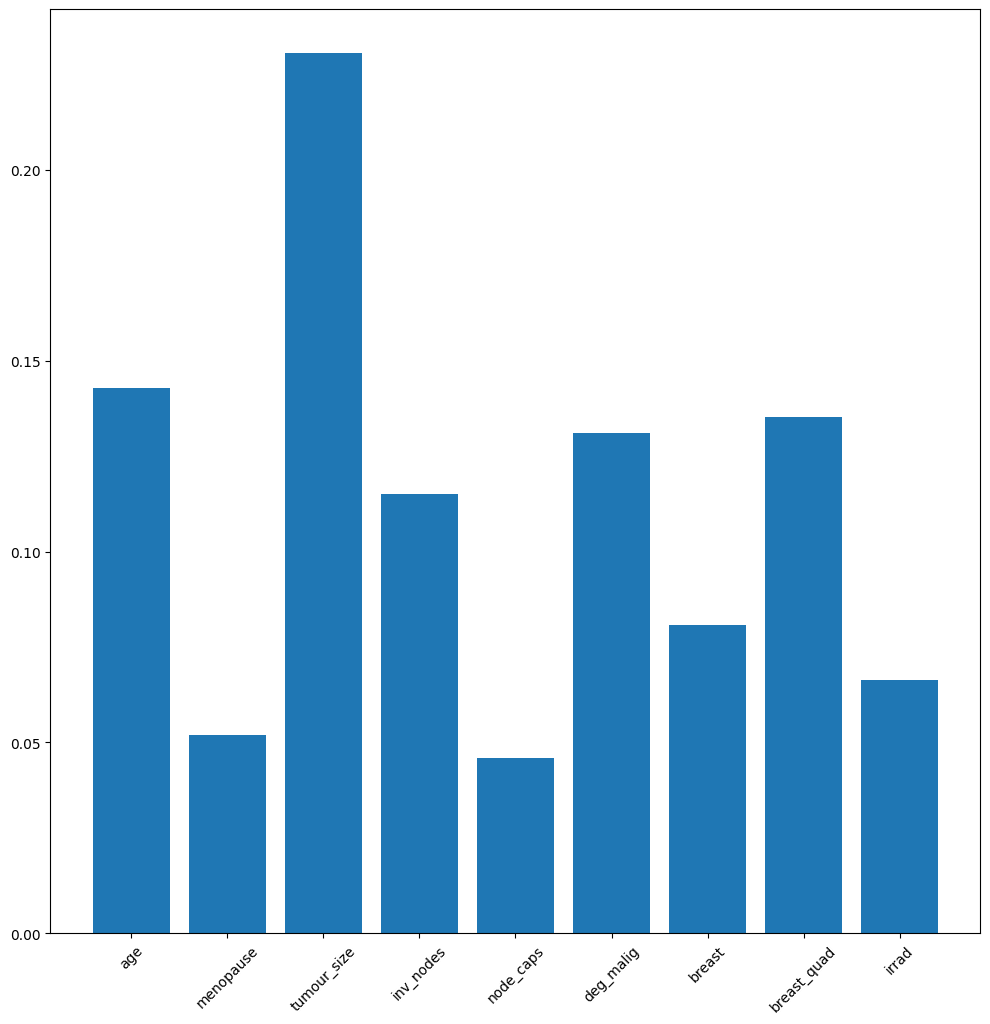

In [360]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

plt.figure(figsize=(12,12))
plt.bar(X_train.columns, clf.feature_importances_)
plt.xticks(rotation=45)

The above histogram shows the importance of each feature.<br>
In this case, ```'tumour_size'```, ```'age'```, ```'breast_quad'``` and ```'deg_malig'``` have the highest importance.

#### Training different models to evaluate performance

In [362]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [363]:
# RandomForestClassifier
clf.score(X_train, y_train)

0.9757575757575757

In [364]:
# error of RandomForestClassifier
mae_clf = metrics.mean_absolute_error(y_test, y_pred)
mse_clf = metrics.mean_squared_error(y_test, y_pred)
print(mae_clf)
print(mse_clf)

0.2833333333333333
0.2833333333333333


In [365]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [366]:
# LogisticRegression
lr.score(X_train, y_train)

0.7393939393939394

In [367]:
# error of LogisticRegression
mae_lr = metrics.mean_absolute_error(y_test, y_pred)
mse_lr = metrics.mean_squared_error(y_test, y_pred)
print(mae_lr)
print(mse_lr)

0.2833333333333333
0.2833333333333333


In [368]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [369]:
# KNeighborsRegressor
knn.score(X_train, y_train)

0.8838845883180859

In [370]:
# error of KNeighborsRegressor
mae_knn = metrics.mean_absolute_error(y_test, y_pred)
mse_knn = metrics.mean_squared_error(y_test, y_pred)
print(mae_knn)
print(mse_knn)

0.2833333333333333
0.2833333333333333


In [371]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [372]:
# GaussianNB
gnb.score(X_train, y_train)

0.703030303030303

In [373]:
# error of GaussianNB
mae_gnb = metrics.mean_absolute_error(y_test, y_pred)
mse_gnb = metrics.mean_squared_error(y_test, y_pred)
print(mae_gnb)
print(mse_gnb)

0.2833333333333333
0.2833333333333333


In [374]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [375]:
# DecisionTreeClassifier
dt.score(X_train, y_train)

0.9757575757575757

In [376]:
# error of DecisionTreeClassifier
mae_dt = metrics.mean_absolute_error(y_test, y_pred)
mse_dt = metrics.mean_squared_error(y_test, y_pred)
print(mae_dt)
print(mse_dt)

0.2833333333333333
0.2833333333333333


##### Now perform Cross-validation 

In [386]:
from sklearn.model_selection import KFold, cross_val_score
import statistics

k_f = KFold(n_splits=10, shuffle=True)

In [387]:
# RandomForestClassifier
clf_kscore = cross_val_score(clf, X, y, cv = k_f, scoring='accuracy')

In [388]:
# RandomForestClassifier
clf_kscore

array([0.79310345, 0.62068966, 0.82758621, 0.65517241, 0.68965517,
       0.57142857, 0.75      , 0.71428571, 0.89285714, 0.78571429])

In [389]:
# RandomForestClassifier
clf_kscore.mean()

0.7300492610837439

In [390]:
# RandomForestClassifier
statistics.stdev(clf_kscore)

0.0989382974372261

In [ ]:
lr_kscore = cross_val_score(lr, X, y, cv = k_f, scoring='accuracy')
print(lr_kscore)
print(lr_kscore.mean())
print(statistics.stdev(lr_kscore))

In [ ]:
knn_kscore = cross_val_score(knn, X, y, cv = k_f, scoring='accuracy')
print(knn_kscore)
print(knn_kscore.mean())
print(statistics.stdev(knn_kscore))

In [ ]:
gnb_kscore = cross_val_score(gnb, X, y, cv = k_f, scoring='accuracy')
print(gnb_kscore)
print(gnb_kscore.mean())
print(statistics.stdev(gnb_kscore))

In [ ]:
dt_kscore = cross_val_score(dt, X, y, cv = k_f, scoring='accuracy')
print(dt_kscore)
print(dt_kscore.mean())
print(statistics.stdev(dt_kscore))